In [1]:
def make_cfg(fname,printIns=False):    
    cfg={}
    
    #helper functions
    op=lambda i: i[0]
    i0=lambda i: i[1]
    i1=lambda i: i[2]
    output=lambda i: i[3]
    label=lambda i: i[4].strip('\n')
    jumpto_uncond=lambda i: i0(i).split('_')[-1]
    jumpto_cond=lambda i: i1(i).split('_')[-1]
    def connect(i,x,edge_annotation=''): 
        assert i!=x,'self-connection detected'
        if label(i) not in cfg: cfg[label(i)]=[]
        if x not in [z[0] for z in cfg[label(i)]]:
            cfg[label(i)].append((x,edge_annotation))
    
    #load instructions
    with open(fname, 'r') as f:
        operations = f.readlines()
        instructions = [o.split(' ') for o in operations]
    
    if printIns:
        for i in instructions:print(i[0][:5],'\t\t',i[1][-2:],'\t',i[2][-2:],'\t',i[3],'\t',i[4].strip('\n'))
        
    #main loop
    for ni,i in enumerate(instructions[:-1]):
        next_i=instructions[ni+1]
        if op(i) == 'Jump': connect(i,jumpto_uncond(i),edge_annotation='Jump')
        if op(i) in ('JumpIfNonzero','JumpIfZero'): 
            connect(i,label(next_i),edge_annotation='else')
            connect(i,jumpto_cond(i),edge_annotation=op(i))
        if (label(i) != label(next_i)) and (op(i)!='Jump'):
            connect(i,label(next_i))

    return cfg

cfg_collatz=make_cfg('../programs/collatz.ins',printIns=True)
cfg_arith=make_cfg('../programs/arith.ins')
cfg_factorial=make_cfg('../programs/factorial.ins')
cfg_collatz

Move 		 0 	 ll 	 1 	 1
LoadC 		 0 	 ll 	 6 	 2
Move 		 6 	 ll 	 5 	 2
Label 		 _3 	 ll 	 null 	 3
LoadC 		 1 	 ll 	 8 	 3
Great 		 1 	 8 	 6 	 3
JumpI 		 6 	 13 	 null 	 3
Label 		 _4 	 ll 	 null 	 4
Move 		 1 	 ll 	 4 	 4
LoadC 		 0 	 ll 	 6 	 5
Move 		 6 	 ll 	 3 	 5
Label 		 _6 	 ll 	 null 	 6
LoadC 		 1 	 ll 	 8 	 6
Great 		 4 	 8 	 6 	 6
JumpI 		 6 	 _9 	 null 	 6
Label 		 _7 	 ll 	 null 	 7
LoadC 		 2 	 ll 	 8 	 7
Minus 		 4 	 8 	 6 	 7
Move 		 6 	 ll 	 4 	 7
LoadC 		 1 	 ll 	 8 	 8
Plus 		 3 	 8 	 6 	 8
Move 		 6 	 ll 	 3 	 8
Jump 		 _6 	 ll 	 null 	 8
Label 		 _9 	 ll 	 null 	 9
LoadC 		 0 	 ll 	 8 	 9
Equal 		 4 	 8 	 6 	 9
JumpI 		 6 	 11 	 null 	 9
Move 		 3 	 ll 	 1 	 10
Jump 		 12 	 ll 	 null 	 10
Label 		 11 	 ll 	 null 	 11
LoadC 		 3 	 ll 	 7 	 11
LoadC 		 1 	 ll 	 10 	 11
Plus 		 1 	 10 	 8 	 11
Times 		 7 	 8 	 6 	 11
Move 		 6 	 ll 	 1 	 11
Label 		 12 	 ll 	 null 	 12
LoadC 		 1 	 ll 	 8 	 12
Plus 		 5 	 8 	 6 	 12
Move 		 6 	 ll 	 5 	 12
Jump 		 _3 	 ll 	 null 	 12

{'1': [('2', '')],
 '2': [('3', '')],
 '3': [('4', 'else'), ('13', 'JumpIfZero')],
 '4': [('5', '')],
 '5': [('6', '')],
 '6': [('7', 'else'), ('9', 'JumpIfZero')],
 '7': [('8', '')],
 '8': [('6', 'Jump')],
 '9': [('10', 'else'), ('11', 'JumpIfZero')],
 '10': [('12', 'Jump')],
 '11': [('12', '')],
 '12': [('3', 'Jump')]}

In [2]:
import graphviz as gv
def visualize(cfg,cfg_name,save=False):
    dot=gv.Digraph(name=cfg_name,
                   graph_attr={'bgcolor':'#24283B','pad':'0.5'},
                  node_attr={'fontsize':'12','fontcolor':'#ffffff','color':'#E0AF68','fontname':'Hack, monospace','shape':'underline'},
                  edge_attr={'color':'#E0AF68','arrowsize':'0.5','fontcolor':'#ffffff','fontsize':'8'})

    for n in cfg:
        dot.node(n)
    for n in cfg:
        for m in cfg[n]:  
            dot.edge(n,m[0],label=m[1])
    if save: dot.render('../programs/dot-files/'+cfg_name+'.dot')
    return dot

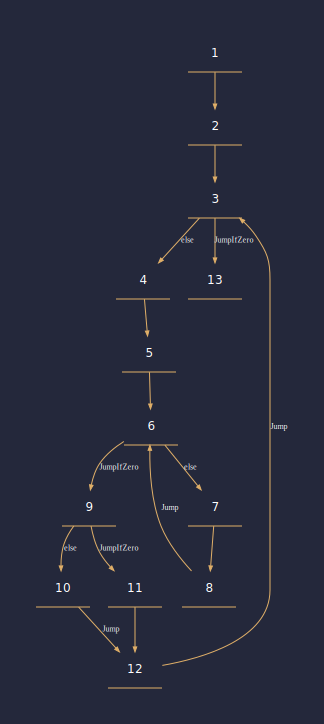

In [3]:
visualize(cfg_collatz,'collatz.cfg',save=False)

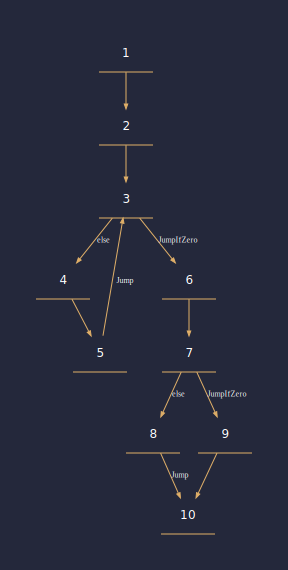

In [5]:
visualize(cfg_arith,'arith.cfg',save=False)

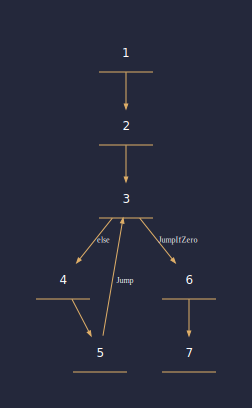

In [6]:
visualize(cfg_factorial,'factorial.cfg',save=False)